In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from docutils.nodes import figure
# from mpmath import arange


In [4]:
df=pd.read_csv("/Users/phantom/District/PhantomLab/CodeSpace/ZPrac/IOC (20250819000000000 _20240807000000000).csv");

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 262 non-null    object 
 1   Open                 262 non-null    float64
 2   High                 262 non-null    float64
 3   Low                  262 non-null    float64
 4   Close                262 non-null    float64
 5   % Change             262 non-null    float64
 6   % Change vs Average  262 non-null    float64
 7   Volume               262 non-null    object 
dtypes: float64(6), object(2)
memory usage: 16.5+ KB
None


In [6]:
print(df.describe())

              Open         High          Low        Close    % Change  \
count   262.000000   262.000000   262.000000   262.000000  262.000000   
mean    815.924618   847.736450   790.871756   822.075000    0.646336   
std     466.723328   486.813851   454.065571   471.898144    4.350185   
min     362.000000   383.000000   348.900000   362.450000  -14.210000   
25%     478.650000   489.700000   461.250000   478.062500   -2.065000   
50%     592.775000   616.900000   579.925000   601.875000    0.585000   
75%    1050.950000  1097.487500  1028.675000  1073.537500    3.005000   
max    2223.300000  2286.150000  2136.550000  2223.050000   19.110000   

       % Change vs Average  
count           262.000000  
mean             -0.000382  
std               4.350414  
min             -14.860000  
25%              -2.715000  
50%              -0.065000  
75%               2.365000  
max              18.470000  


In [7]:
print(df["Close"].head())

0    491.90
1    493.50
2    476.10
3    485.10
4    508.65
Name: Close, dtype: float64


In [8]:
print(df[df["Close"]>385.2])

                                                  Date     Open     High  \
0    Mon Aug 17 2020 00:00:00 GMT+0530 (India Stand...   495.10   508.50   
1    Mon Aug 24 2020 00:00:00 GMT+0530 (India Stand...   492.00   506.25   
2    Mon Aug 31 2020 00:00:00 GMT+0530 (India Stand...   499.00   501.20   
3    Mon Sep 07 2020 00:00:00 GMT+0530 (India Stand...   484.50   487.45   
4    Mon Sep 14 2020 00:00:00 GMT+0530 (India Stand...   492.00   518.10   
..                                                 ...      ...      ...   
257  Mon Jul 21 2025 00:00:00 GMT+0530 (India Stand...  2223.30  2237.85   
258  Mon Jul 28 2025 00:00:00 GMT+0530 (India Stand...  2164.30  2177.50   
259  Mon Aug 04 2025 00:00:00 GMT+0530 (India Stand...  2063.00  2097.50   
260  Mon Aug 11 2025 00:00:00 GMT+0530 (India Stand...  2025.00  2072.35   
261  Mon Aug 18 2025 00:00:00 GMT+0530 (India Stand...  1999.15  2041.50   

         Low    Close  % Change  % Change vs Average     Volume  
0     471.20   491.90

In [9]:
df["Double"] = df['Close'] * 2
print(df.head())

                                                Date   Open    High     Low  \
0  Mon Aug 17 2020 00:00:00 GMT+0530 (India Stand...  495.1  508.50  471.20   
1  Mon Aug 24 2020 00:00:00 GMT+0530 (India Stand...  492.0  506.25  475.00   
2  Mon Aug 31 2020 00:00:00 GMT+0530 (India Stand...  499.0  501.20  461.00   
3  Mon Sep 07 2020 00:00:00 GMT+0530 (India Stand...  484.5  487.45  450.25   
4  Mon Sep 14 2020 00:00:00 GMT+0530 (India Stand...  492.0  518.10  476.10   

    Close  % Change  % Change vs Average     Volume  Double  
0  491.90      3.47                 2.82  1,925,624   983.8  
1  493.50      0.33                -0.32    793,151   987.0  
2  476.10     -3.53                -4.17    570,111   952.2  
3  485.10      1.89                 1.24    560,774   970.2  
4  508.65      4.85                 4.21    770,833  1017.3  


In [10]:
df["Date"] = df["Date"].str.replace(r"\s*\(.*\)$","", regex=True)
df["Date"] = df["Date"].str.replace(r"\s*GMT[+-]\d{4}","", regex=True)
df["Date"] = df["Date"].str.replace(r"\s*\{GMT+0530}$","", regex=True)

In [11]:
print(df.head())

                       Date   Open    High     Low   Close  % Change  \
0  Mon Aug 17 2020 00:00:00  495.1  508.50  471.20  491.90      3.47   
1  Mon Aug 24 2020 00:00:00  492.0  506.25  475.00  493.50      0.33   
2  Mon Aug 31 2020 00:00:00  499.0  501.20  461.00  476.10     -3.53   
3  Mon Sep 07 2020 00:00:00  484.5  487.45  450.25  485.10      1.89   
4  Mon Sep 14 2020 00:00:00  492.0  518.10  476.10  508.65      4.85   

   % Change vs Average     Volume  Double  
0                 2.82  1,925,624   983.8  
1                -0.32    793,151   987.0  
2                -4.17    570,111   952.2  
3                 1.24    560,774   970.2  
4                 4.21    770,833  1017.3  


In [12]:
df["Date"]=pd.to_datetime(df["Date"],format="%a %b %d %Y %H:%M:%S")
print(df.dtypes)
print(df[["Date"]])

Date                   datetime64[ns]
Open                          float64
High                          float64
Low                           float64
Close                         float64
% Change                      float64
% Change vs Average           float64
Volume                         object
Double                        float64
dtype: object
          Date
0   2020-08-17
1   2020-08-24
2   2020-08-31
3   2020-09-07
4   2020-09-14
..         ...
257 2025-07-21
258 2025-07-28
259 2025-08-04
260 2025-08-11
261 2025-08-18

[262 rows x 1 columns]


In [13]:
df["Range"] = df["High"] - df["Low"]

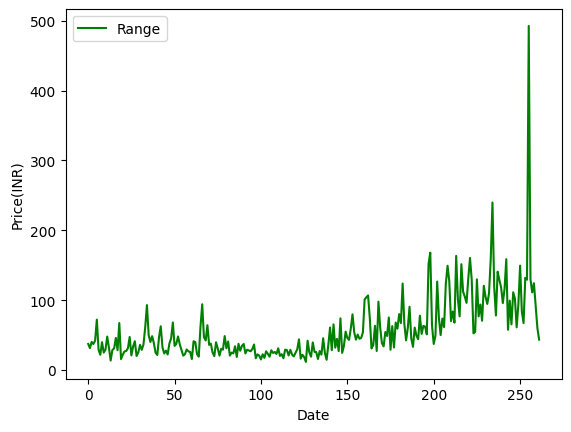

In [16]:
plt.plot(df["Range"], label="Range",color='green')
plt.legend();
plt.xlabel("Date");
plt.ylabel("Price(INR)");
plt.show();

In [18]:
import plotly.graph_objects as go

In [20]:
fig = go.Figure(data=[go.Candlestick(
    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.update_layout(
    title='Interactive Candlestick Chart',
    xaxis_rangeslider_visible=False
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed